# KNN

Realizando os imports e inicializando o dataframe com o arquivo CSV

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

CSV_FULL_PATH = '../CSVs/pokemon.csv'

data_pandas = pd.read_csv(CSV_FULL_PATH)
df = pd.DataFrame(data_pandas)

x = df.drop(['attack', 'defense', 'sp_attack', 'sp_defense', 'is_legendary', 'name'], axis=1)
y = df['is_legendary']

## Separando os dados, definindo o número 'k' de vizinhos e testando o modelo

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 16)

precision_list = []
recall_list = []
f1_list = []

for n_neighbors in neighbors_settings:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)

    training_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

    y_pred = model.predict(x_test)
    recall_list.append(confusion_matrix(y_test, y_pred)[1][1] / (
                confusion_matrix(y_test, y_pred)[1][1] + confusion_matrix(y_test, y_pred)[1][0]))
    precision_list.append(confusion_matrix(y_test, y_pred)[1][1] / (
                confusion_matrix(y_test, y_pred)[1][1] + confusion_matrix(y_test, y_pred)[0][1]))
    f1_list.append(2 * (precision_list[-1] * recall_list[-1]) / (precision_list[-1] + recall_list[-1]))


## Visualizando o resultado
Vamos ver como o algoritmo se comporta com diferentes números de vizinhos e como ficam as precisões de treinamento e teste.

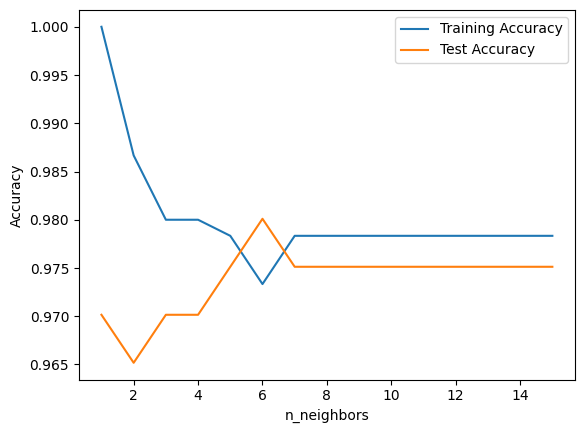

In [15]:
plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

# Visualizando o resultado para o número de vizinhos ideal

In [16]:
best_n = test_accuracy.index(max(test_accuracy)) + 1
best_model = KNeighborsClassifier(n_neighbors=best_n)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print('Accuracy: {}%'.format(accuracy_score(y_test, y_pred) * 100))
recall = confusion_matrix(y_test, y_pred)[1][1] / (
            confusion_matrix(y_test, y_pred)[1][1] + confusion_matrix(y_test, y_pred)[1][0])
f1 = 2 * (recall * accuracy_score(y_test, y_pred)) / (recall + accuracy_score(y_test, y_pred))
precision = confusion_matrix(y_test, y_pred)[1][1] / (
            confusion_matrix(y_test, y_pred)[1][1] + confusion_matrix(y_test, y_pred)[0][1])
print('Recall: {}%'.format(recall * 100))
print('F1: {}%'.format(f1 * 100))
print('Precision: {}%'.format(precision * 100))

Accuracy: 98.00995024875621%
Recall: 89.47368421052632%
F1: 93.54748603351956%
Precision: 89.47368421052632%


In [17]:
# Comparação mais profunda entre diferentes números de vizinhos

In [18]:
print('n_neighbors\t\tTest Accuracy\t\tPrecision\t\tRecall\t\tF1')
results = pd.DataFrame({'n_neighbors': neighbors_settings, 'Test Accuracy': test_accuracy, 'Precision': precision_list,
                        'Recall': recall_list, 'F1': f1_list})
results = results.round(2)
results

n_neighbors		Test Accuracy		Precision		Recall		F1


,n_neighbors,Test Accuracy,Precision,Recall,F1
0,1,0.97,0.93,0.74,0.82
1,2,0.97,0.93,0.68,0.79
2,3,0.97,0.84,0.84,0.84
3,4,0.97,0.84,0.84,0.84
4,5,0.98,0.85,0.89,0.87
5,6,0.98,0.89,0.89,0.89
6,7,0.98,0.85,0.89,0.87
7,8,0.98,0.85,0.89,0.87
8,9,0.98,0.85,0.89,0.87
9,10,0.98,0.85,0.89,0.87


# Matriz de confusão

In [19]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), figsize=(6, 6), cmap=plt.cm.Greens)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
for t in ax.texts:
    t.set_color('red')
plt.savefig('confusion_matrix.png')
plt.clf()

<Figure size 600x600 with 0 Axes>

# Resultados para o número de vizinhos ideal

In [20]:
leg_pred_as_leg = []
leg_pred_as_not_leg = []
not_leg_pred_as_leg = []
for i in range(len(y_pred)):
    if y_pred[i] == 1 and y_test.iloc[i] == 1:
        leg_pred_as_leg.append(df.loc[x_test.index[i], 'name'])
    elif y_pred[i] == 0 and y_test.iloc[i] == 1:
        leg_pred_as_not_leg.append(df.loc[x_test.index[i], 'name'])
    elif y_pred[i] == 1 and y_test.iloc[i] == 0:
        not_leg_pred_as_leg.append(df.loc[x_test.index[i], 'name'])
leg_df = pd.DataFrame({'Pokemon': leg_pred_as_leg, 'Predicted': 'Legendary', 'Actual': 'Legendary'})
not_leg_df = pd.DataFrame({'Pokemon': leg_pred_as_not_leg, 'Predicted': 'Not Legendary', 'Actual': 'Legendary'})
not_leg_pred_as_leg_df = pd.DataFrame(
    {'Pokemon': not_leg_pred_as_leg, 'Predicted': 'Legendary', 'Actual': 'Not Legendary'})
df = pd.concat([leg_df, not_leg_df, not_leg_pred_as_leg_df])
df

,Pokemon,Predicted,Actual
0,Cresselia,Legendary,Legendary
1,Shaymin,Legendary,Legendary
2,Deoxys,Legendary,Legendary
3,Raikou,Legendary,Legendary
4,Tornadus,Legendary,Legendary
5,Zygarde,Legendary,Legendary
6,Landorus,Legendary,Legendary
7,Lugia,Legendary,Legendary
8,Hoopa,Legendary,Legendary
9,Mesprit,Legendary,Legendary
